In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("Wholesale customers data.csv")


In [6]:
df.shape

(440, 8)

In [7]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
df.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [11]:
df_clean = df.drop(columns=["Channel", "Region"])


In [12]:
df_clean.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [13]:
df_clean.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [14]:
X = df_clean.copy()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled.shape

(440, 6)

In [17]:
inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


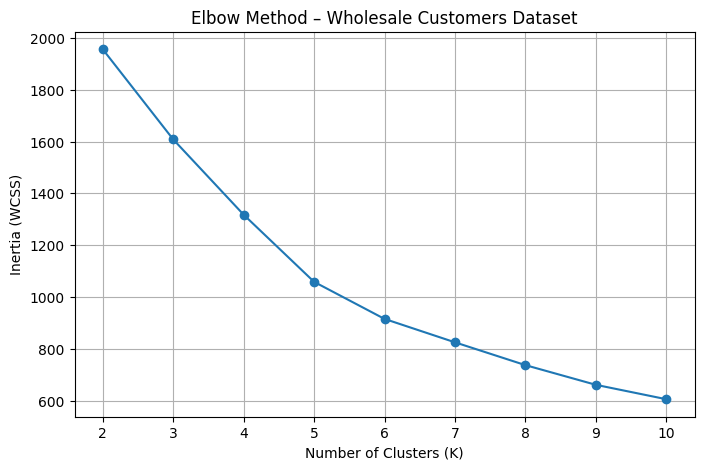

In [18]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method – Wholesale Customers Dataset")
plt.grid(True)
plt.show()


In [19]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score:.4f}")

K = 2, Silhouette Score = 0.5472
K = 3, Silhouette Score = 0.5483
K = 4, Silhouette Score = 0.3485
K = 5, Silhouette Score = 0.3690
K = 6, Silhouette Score = 0.3782
K = 7, Silhouette Score = 0.3343
K = 8, Silhouette Score = 0.3201
K = 9, Silhouette Score = 0.3090
K = 10, Silhouette Score = 0.3112


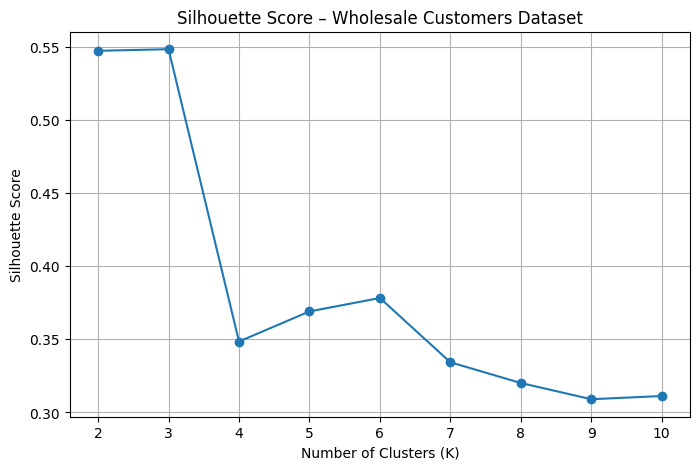

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score – Wholesale Customers Dataset")
plt.grid(True)
plt.show()

In [21]:
optimal_k = 4

kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)

clusters = kmeans.fit_predict(X_scaled)

df_clean["Cluster"] = clusters


In [22]:
df_clean["Cluster"].value_counts()


Cluster
1    315
0    110
2     10
3      5
Name: count, dtype: int64

In [23]:
cluster_summary = df_clean.groupby("Cluster").mean()
cluster_summary

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909
1,13504.987302,3044.539683,3844.444444,3271.425397,852.320635,1127.107937
2,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
3,50270.600000,26361.800000,16416.000000,25122.800000,2475.000000,18595.200000


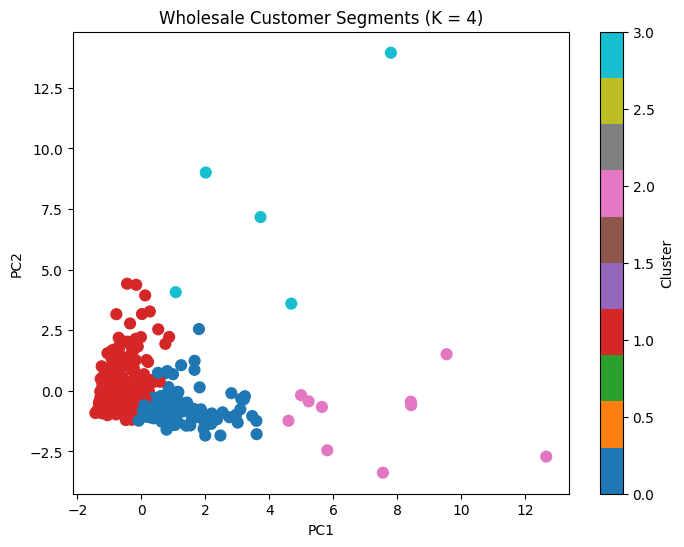

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df_clean["Cluster"],
    cmap="tab10",
    s=60
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wholesale Customer Segments (K = 4)")
plt.colorbar(label="Cluster")
plt.show()


In [25]:
import joblib

joblib.dump(kmeans, "kmeans_wholesale.pkl")
joblib.dump(scaler, "scaler_wholesale.pkl")


['scaler_wholesale.pkl']

In [26]:
cluster_summary.to_csv("cluster_summary.csv")


In [27]:
loaded_kmeans = joblib.load("kmeans_wholesale.pkl")
loaded_scaler = joblib.load("scaler_wholesale.pkl")

loaded_kmeans.n_clusters


4